<a href="https://colab.research.google.com/github/Many98/real_estate/blob/criminality/notebooks/criminality_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import pandas as pd
import xarray as xr
import datetime 
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
pd.set_option('display.max_columns', None)
df_nopred = pd.read_csv('/content/drive/MyDrive/reality/dataset_2.csv', sep=',', delimiter=None, encoding="utf8")

In [3]:
df_nopred.columns

Index(['city_district', 'additional_disposition', 'air_quality', 'atm_dist',
       'built_density', 'bus_station_dist', 'construction_type', 'daily_noise',
       'date', 'desc_hash', 'description', 'disposition', 'doctor_dist',
       'electricity', 'electricity_txt', 'energy_effeciency', 'equipment',
       'floor', 'floor_area', 'gas', 'geometry', 'gp_ci_high_price',
       'gp_ci_low_price', 'gp_mean_price', 'gp_std_price', 'has_balcony',
       'has_cellar', 'has_garage', 'has_garden', 'has_lift', 'has_loggia',
       'has_parking', 'hash', 'header', 'heating', 'heating_txt',
       'kindergarten_dist', 'lat', 'long', 'name', 'nightly_noise',
       'no_barriers', 'note', 'ownership', 'pharmacy_dist', 'place',
       'playground_dist', 'post_office_dist', 'price', 'primary_school_dist',
       'restaurant_pub_dist', 'sports_field_dist', 'state',
       'subway_station_dist', 'sun_glare', 'supermarket_grocery_dist', 'tags',
       'telecomunication', 'telecomunication_txt', 'theat

## Loading prepared dataset

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/reality/discounted_crime_2.csv', sep=',', delimiter=None, encoding="utf8")

In [5]:
df2.head()

,Unnamed: 0,index,id,x,y,date,types,crime_idx,cut_x,cut_y,disc_index
0,0,85,6027950,14.423841,50.089270,2016-01-02,krádeže na osobách,0.038462,"(14.423, 14.425]","(50.0885, 50.0894]",0.020440
1,1,86,6027956,14.448420,50.082480,2016-01-02,krádeže součástek aut,0.031111,"(14.448, 14.449]","(50.0822, 50.0831]",0.016534
2,2,87,6027958,14.418877,50.077282,2016-01-02,vloupání do prodejny,0.038462,"(14.417, 14.419]","(50.0768, 50.0777]",0.020440
3,3,88,6027982,14.427781,50.078349,2016-01-02,krádeže na osobách,0.038462,"(14.426, 14.428]","(50.0777, 50.0786]",0.020440
4,4,89,6028004,14.421398,50.084477,2016-01-02,krádeže na osobách,0.038462,"(14.421, 14.423]","(50.084, 50.0849]",0.020440


In [6]:
!pip install geopandas -U 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import geopandas as gdp

In [8]:
df2.columns

Index(['Unnamed: 0', 'index', 'id', 'x', 'y', 'date', 'types', 'crime_idx',
       'cut_x', 'cut_y', 'disc_index'],
      dtype='object')

In [9]:
df3 = df2[df2.columns.difference(['Unnamed: 0', 'index','cut_x', 'cut_y'])]

In [10]:
gdf = gdp.GeoDataFrame(
    df3, geometry=gdp.points_from_xy(df3.x, df3.y))

In [11]:
gdf

,crime_idx,date,disc_index,id,types,x,y,geometry
0,0.038462,2016-01-02,0.020440,6027950,krádeže na osobách,14.423841,50.089270,POINT (14.42384 50.08927)
1,0.031111,2016-01-02,0.016534,6027956,krádeže součástek aut,14.448420,50.082480,POINT (14.44842 50.08248)
2,0.038462,2016-01-02,0.020440,6027958,vloupání do prodejny,14.418877,50.077282,POINT (14.41888 50.07728)
3,0.038462,2016-01-02,0.020440,6027982,krádeže na osobách,14.427781,50.078349,POINT (14.42778 50.07835)
4,0.038462,2016-01-02,0.020440,6028004,krádeže na osobách,14.421398,50.084477,POINT (14.42140 50.08448)
...,...,...,...,...,...,...,...,...
139403,0.031111,2022-10-26,0.031111,19656779,krádeže součástek aut,14.315833,50.069531,POINT (14.31583 50.06953)
139404,0.038462,2022-10-26,0.038462,19656917,krádeže motorových vozidel (dvoustopových),14.472246,50.069943,POINT (14.47225 50.06994)
139405,0.010000,2022-10-26,0.010000,19657135,dopravní nehody,14.494546,50.100211,POINT (14.49455 50.10021)
139406,0.031111,2022-10-26,0.031111,19657389,krádeže součástek aut,14.437646,50.047865,POINT (14.43765 50.04787)


In [12]:
df2.describe()

,Unnamed: 0,index,id,x,y,crime_idx,disc_index
count,139408.000000,139408.000000,1.394080e+05,139408.000000,139408.000000,139408.000000,139408.000000
mean,69703.500000,10459.651770,1.161785e+07,14.447896,50.074527,0.034807,0.025146
std,40243.767501,6483.013071,3.526139e+06,0.057831,0.031090,0.005536,0.006459
min,0.000000,0.000000,6.027950e+06,14.252392,49.945697,0.010000,0.005314
25%,34851.750000,4991.000000,8.757992e+06,14.419406,50.056977,0.031111,0.020440
50%,69703.500000,9969.500000,1.134748e+07,14.439100,50.077702,0.038462,0.025200
75%,104555.250000,15308.000000,1.398396e+07,14.480979,50.091089,0.038462,0.028038
max,139407.000000,25027.000000,1.970392e+07,14.696000,50.171682,0.066667,0.066667


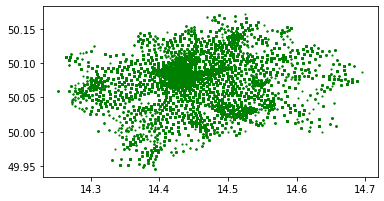

In [13]:
gdf.plot(marker='.', color='green', markersize=5);

In [14]:
!pip install geocube -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import json
from functools import partial
from shapely.geometry import box, mapping

from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_points_griddata, rasterize_points_radial

%matplotlib inline

In [16]:
geo_grid = make_geocube(
    vector_data=gdf,
    measurements=['disc_index'],
    resolution=(-0.001, 0.001),
    rasterize_function=rasterize_points_griddata,
)

In [17]:
geo_grid

<xarray.Dataset>
Dimensions:      (y: 227, x: 444)
Coordinates:
  * y            (y) float64 50.17 50.17 50.17 50.17 ... 49.95 49.95 49.95 49.95
  * x            (x) float64 14.25 14.25 14.25 14.26 ... 14.69 14.69 14.69 14.7
    spatial_ref  int64 0
Data variables:
    disc_index   (y, x) float64 0.006561 0.006561 0.006561 ... 0.02523 0.02523

In [18]:
sum(sum(geo_grid['disc_index']))

<xarray.DataArray 'disc_index' ()>
array(2245.76620436)
Coordinates:
    spatial_ref  int64 0
    y            float64 49.95

but according to df2

In [19]:
sum(df2['disc_index'])

3505.581829057775

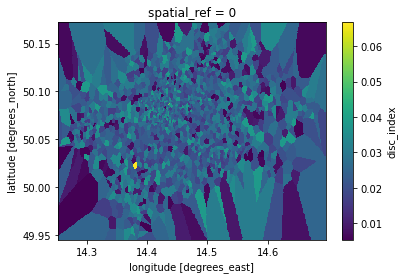

In [20]:
geo_grid.disc_index.where(geo_grid.disc_index!=geo_grid.disc_index.rio.nodata).plot()

In [21]:
geo_grid

<xarray.Dataset>
Dimensions:      (y: 227, x: 444)
Coordinates:
  * y            (y) float64 50.17 50.17 50.17 50.17 ... 49.95 49.95 49.95 49.95
  * x            (x) float64 14.25 14.25 14.25 14.26 ... 14.69 14.69 14.69 14.7
    spatial_ref  int64 0
Data variables:
    disc_index   (y, x) float64 0.006561 0.006561 0.006561 ... 0.02523 0.02523

In [22]:
from geocube.rasterize import rasterize_image

geo_grid = make_geocube(
    vector_data=gdf,
    measurements=['disc_index'],
    resolution=(-0.001, 0.001),
    rasterize_function=partial(rasterize_image, all_touched=True),
)

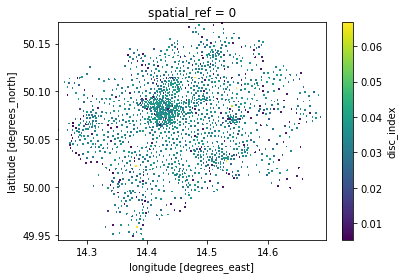

In [23]:
geo_grid.disc_index.where(geo_grid.disc_index!=geo_grid.disc_index.rio.nodata).plot()

In [24]:
geo_grid = make_geocube(
    vector_data=gdf,
    measurements=['disc_index'],
    resolution=(-0.001, 0.001),
    rasterize_function=partial(rasterize_points_griddata, method="cubic"),
)

This "destroys" 'disc_index' values (makes nan from all values)

In [25]:
geo_grid

<xarray.Dataset>
Dimensions:      (y: 227, x: 444)
Coordinates:
  * y            (y) float64 50.17 50.17 50.17 50.17 ... 49.95 49.95 49.95 49.95
  * x            (x) float64 14.25 14.25 14.25 14.26 ... 14.69 14.69 14.69 14.7
    spatial_ref  int64 0
Data variables:
    disc_index   (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan

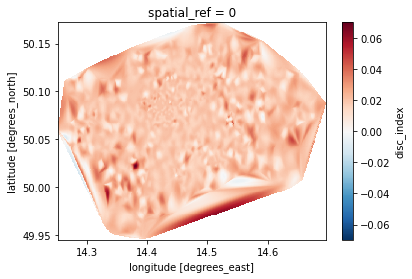

In [26]:
# mask nodata and plot
geo_grid.disc_index.where(geo_grid.disc_index!=geo_grid.disc_index.rio.nodata).plot()

In [27]:
geo_grid.disc_index

<xarray.DataArray 'disc_index' (y: 227, x: 444)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * y            (y) float64 50.17 50.17 50.17 50.17 ... 49.95 49.95 49.95 49.95
  * x            (x) float64 14.25 14.25 14.25 14.26 ... 14.69 14.69 14.69 14.7
    spatial_ref  int64 0
Attributes:
    name:        disc_index
    long_name:   disc_index
    _FillValue:  nan

In [28]:
df2.types.drop_duplicates().values.tolist()

['krádeže na osobách',
 'krádeže součástek aut',
 'vloupání do prodejny',
 'krádeže motorových vozidel (dvoustopových)',
 'krádeže jízdních kol',
 'loupež',
 'vloupání do bytu',
 'vydírání',
 'úmyslné ublížení na zdraví',
 'vloupání do rodinných domů',
 'vloupání do ubytovacích objektů',
 'dopravní nehody',
 'výtržnictví',
 'vloupání do restaurace',
 'nebezpečné vyhrožování',
 'omezování osobní svobody',
 'obecné ohrožení',
 'krádeže motorových vozidel (jednostopových)',
 'nedovolené ozbrojování',
 'útok proti výkonu pravomoci stát. orgánu',
 'vražda',
 'chladná zbraň',
 'násilí proti skupině/jednotlivci',
 'střelná zbraň',
 'rvačka',
 'obchod s lidmi',
 'únos']

In [40]:
crimeslist = df2.types.drop_duplicates().values.tolist()
categorical_enums = {'types': crimeslist}

In [41]:
#!pip install geoplot -U
# import geoplot

In [42]:
geo_grid

<xarray.Dataset>
Dimensions:      (y: 227, x: 444)
Coordinates:
  * y            (y) float64 50.17 50.17 50.17 50.17 ... 49.95 49.95 49.95 49.95
  * x            (x) float64 14.25 14.25 14.25 14.26 ... 14.69 14.69 14.69 14.7
    spatial_ref  int64 0
Data variables:
    disc_index   (y, x) float64 0.006561 0.006561 0.006561 ... 0.02523 0.02523

In [32]:
geo_grid = make_geocube(
    vector_data=gdf,
    measurements=['disc_index'],
    resolution=(-0.001, 0.001),
    rasterize_function=rasterize_points_griddata,
)

In [33]:
geo_grid

<xarray.Dataset>
Dimensions:      (y: 227, x: 444)
Coordinates:
  * y            (y) float64 50.17 50.17 50.17 50.17 ... 49.95 49.95 49.95 49.95
  * x            (x) float64 14.25 14.25 14.25 14.26 ... 14.69 14.69 14.69 14.7
    spatial_ref  int64 0
Data variables:
    disc_index   (y, x) float64 0.006561 0.006561 0.006561 ... 0.02523 0.02523

In [34]:
geo_grid = make_geocube(
    vector_data=gdf,
    measurements=['disc_index'],
    resolution=(-0.001, 0.001),
    fill = 0,
    rasterize_function=rasterize_points_griddata,
)

In [35]:
geo_grid

<xarray.Dataset>
Dimensions:      (y: 227, x: 444)
Coordinates:
  * y            (y) float64 50.17 50.17 50.17 50.17 ... 49.95 49.95 49.95 49.95
  * x            (x) float64 14.25 14.25 14.25 14.26 ... 14.69 14.69 14.69 14.7
    spatial_ref  int64 0
Data variables:
    disc_index   (y, x) float64 0.006561 0.006561 0.006561 ... 0.02523 0.02523

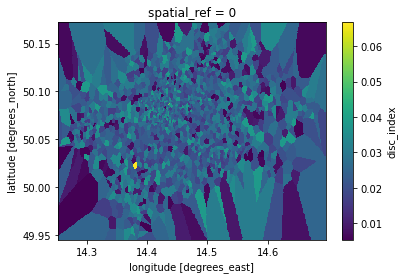

In [36]:
geo_grid.disc_index.where(geo_grid.disc_index!=geo_grid.disc_index.rio.nodata).plot()

## Categorical values

In [43]:
gdf.types.drop_duplicates().values.tolist()

['krádeže na osobách',
 'krádeže součástek aut',
 'vloupání do prodejny',
 'krádeže motorových vozidel (dvoustopových)',
 'krádeže jízdních kol',
 'loupež',
 'vloupání do bytu',
 'vydírání',
 'úmyslné ublížení na zdraví',
 'vloupání do rodinných domů',
 'vloupání do ubytovacích objektů',
 'dopravní nehody',
 'výtržnictví',
 'vloupání do restaurace',
 'nebezpečné vyhrožování',
 'omezování osobní svobody',
 'obecné ohrožení',
 'krádeže motorových vozidel (jednostopových)',
 'nedovolené ozbrojování',
 'útok proti výkonu pravomoci stát. orgánu',
 'vražda',
 'chladná zbraň',
 'násilí proti skupině/jednotlivci',
 'střelná zbraň',
 'rvačka',
 'obchod s lidmi',
 'únos']

In [44]:
crimes_list = ['krádeže na osobách',
 'krádeže součástek aut',
 'vloupání do prodejny',
 'krádeže motorových vozidel (dvoustopových)',
 'krádeže jízdních kol',
 'loupež',
 'vloupání do bytu',
 'vydírání',
 'úmyslné ublížení na zdraví',
 'vloupání do rodinných domů',
 'vloupání do ubytovacích objektů',
 'dopravní nehody',
 'výtržnictví',
 'vloupání do restaurace',
 'nebezpečné vyhrožování',
 'omezování osobní svobody',
 'obecné ohrožení',
 'krádeže motorových vozidel (jednostopových)',
 'nedovolené ozbrojování',
 'útok proti výkonu pravomoci stát. orgánu',
 'vražda',
 'chladná zbraň',
 'násilí proti skupině/jednotlivci',
 'střelná zbraň',
 'rvačka',
 'obchod s lidmi',
 'únos']

In [45]:
categorical_enums = {'types': crimes_list}

In [ ]:
# out_grid = make_geocube(
#     vector_data=gdf,
#     #output_crs="epsg:32615",
#     measurements=['disc_index'],
#     resolution=(-0.01, 0.01),
#     categorical_enums=categorical_enums
# )

Dělá problémy, není nutné řešit

## MAP

In [55]:
df3 = df2[['id', 'x',	'y', 'disc_index']].copy()

In [56]:
df3['xy'] = list(zip(df3.x, df3.y))

In [57]:
df3.head()

,id,x,y,disc_index,xy
0,6027950,14.423841,50.089270,0.020440,"(14.423841, 50.08927)"
1,6027956,14.448420,50.082480,0.016534,"(14.44842, 50.08248)"
2,6027958,14.418877,50.077282,0.020440,"(14.418877, 50.077282)"
3,6027982,14.427781,50.078349,0.020440,"(14.427781, 50.078349)"
4,6028004,14.421398,50.084477,0.020440,"(14.421398, 50.084477)"


In [58]:
df3 = df3[df3.columns.difference(['x', 'y'])]

In [59]:
help1 = df3.groupby(['xy']).apply(lambda df3: df3['disc_index'].sum())

In [60]:
df4 = df3.groupby( ['xy'] ).count()

In [61]:
df4['disc_index'] = help1

In [62]:
df_final = df4[df4.columns.difference(['id'])]

In [65]:
df_final.head()

,disc_index
xy,
"(14.252392, 50.059311)",0.100560
"(14.263671, 50.109646)",3.158116
"(14.268226, 50.10447)",2.936840
"(14.26839, 50.059282)",0.258757
"(14.26859, 50.096719)",0.057759


In [66]:
df_final= df_final.reset_index()

In [67]:
df_final['xy'].nunique()

1724

In [68]:
df_final[['x', 'y']] = pd.DataFrame(df_final['xy'].tolist(), index=df_final.index)

In [70]:
df_final = df_final[df_final.columns.difference(['xy'])]

In [71]:
df_final.head()

,disc_index,x,y
0,0.100560,14.252392,50.059311
1,3.158116,14.263671,50.109646
2,2.936840,14.268226,50.104470
3,0.258757,14.268390,50.059282
4,0.057759,14.268590,50.096719


In [72]:
gdf2 = gdp.GeoDataFrame(
    df_final, geometry=gdp.points_from_xy(df_final.x, df_final.y))

In [73]:
gdf2

,disc_index,x,y,geometry
0,0.100560,14.252392,50.059311,POINT (14.25239 50.05931)
1,3.158116,14.263671,50.109646,POINT (14.26367 50.10965)
2,2.936840,14.268226,50.104470,POINT (14.26823 50.10447)
3,0.258757,14.268390,50.059282,POINT (14.26839 50.05928)
4,0.057759,14.268590,50.096719,POINT (14.26859 50.09672)
...,...,...,...,...
1719,0.987694,14.680413,50.072187,POINT (14.68041 50.07219)
1720,0.332667,14.680481,50.077492,POINT (14.68048 50.07749)
1721,0.109620,14.684184,50.096478,POINT (14.68418 50.09648)
1722,0.501258,14.687830,50.073627,POINT (14.68783 50.07363)


In [90]:
geo_grid = make_geocube(
    vector_data=gdf2,
    measurements=['disc_index'],
    resolution=(-0.001, 0.001),
    fill = 0,
    rasterize_function=rasterize_points_griddata,
)

In [91]:
geo_grid

<xarray.Dataset>
Dimensions:      (y: 227, x: 444)
Coordinates:
  * y            (y) float64 50.17 50.17 50.17 50.17 ... 49.95 49.95 49.95 49.95
  * x            (x) float64 14.25 14.25 14.25 14.26 ... 14.69 14.69 14.69 14.7
    spatial_ref  int64 0
Data variables:
    disc_index   (y, x) float64 0.08411 0.08411 0.08411 ... 0.09164 0.09164

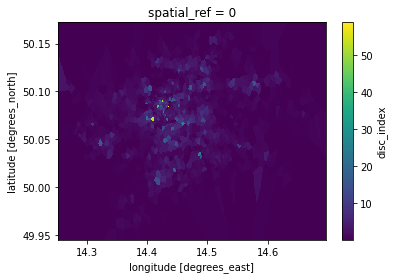

In [92]:
geo_grid.disc_index.where(geo_grid.disc_index!=geo_grid.disc_index.rio.nodata).plot()
plt.show()

In [ ]:
y_max, y_min = np.max(df2['cut_y']), np.min(df2['cut_y'])
x_max, x_min = np.max(df2['cut_x']), np.min(df2['cut_x'])
x_co = np.linspace(x_min, x_max, 250)
y_co = np.linspace(y_min, y_max, 250)

In [ ]:
x_coords2 = xr.DataArray(x_co, dims="points")
y_coords2 = xr.DataArray(y_co, dims="points")

In [ ]:
noise_day_query = geo_grid.sel(x=x_coords, y=y_coords, method='nearest').values.flatten()

In [ ]:
crimes1d = geo_grid.isel(x=50)
crimes1d.plot.line()

In [ ]:
air2d = geo_grid.isel()

air2d.plot.contour()

In [ ]:
air2d.plot.contourf()

## Previous stuff

In [ ]:
df3 = df2[['id', 'x',	'y', 'disc_index']].copy()

In [ ]:
df3['xy'] = list(zip(df3.x, df3.y))

In [ ]:
df3.head()

In [ ]:
df3 = df3[df3.columns.difference(['x', 'y'])]

In [ ]:
help1 = df3.groupby(['xy']).apply(lambda df3: df3['disc_index'].sum())

In [ ]:
df4 = df3.groupby( ['xy'] ).count()

In [ ]:
df4['disc_index'] = help1

In [ ]:
df_final = df4[df4.columns.difference(['id'])]

In [ ]:
df_final.head()

Maybe to separate x-y?

In [ ]:
df_final= df_final.reset_index()

In [ ]:
df_final['xy'].nunique()

In [ ]:
df_final[['x', 'y']] = pd.DataFrame(df_final['xy'].tolist(), index=df_final.index)

In [ ]:
df_final['x'].nunique()

In [ ]:
df_final['y'].nunique()

In [ ]:
result_df = df_final.drop_duplicates(subset=['x', 'y'], keep='first')

In [ ]:
result_df['x'].nunique()

In [ ]:
df_final = df_final.drop_duplicates(subset=['y'], keep='first')
df_final = df_final.drop_duplicates(subset=['x'], keep='first')

In [ ]:
df_final = df_final[df_final.columns.difference(['xy'])]

In [ ]:
df_final.head()

In [ ]:
df_final = df_final.set_index(['x', 'y'])

In [ ]:
df_final['disc_index'].isna().sum()

In [ ]:
crim_dataset = xr.Dataset.from_dataframe(df_final)

In [ ]:
crim_dataset

In [ ]:
df_final= df_final.reset_index()
df_final.head()

In [ ]:
crim_dataset2 = xr.Dataset(
    data_vars=dict(
        disc_index=(["x", "y"], df_final['disc_index']),
    ),
    coords=dict(
        lon=(["x", "y"], df_final['x']),
        lat=(["x", "y"], df_final['y']),
    ),
    attrs=dict(description="Prague crimes map data."),
)

Dalsi pokusy

## Data v polickach

In [ ]:
df2.groupby(['cut_x', 'cut_y']).apply(lambda df3: df3['disc_index'].sum())

In [ ]:
df3['disc_index'].hist()

In [ ]:
type(df3.loc[0,'cut_x'])

In [ ]:
import ast

In [ ]:
def interval_type(s):
    """Parse interval string to Interval"""
    
    table = str.maketrans({'[': '(', ']': ')'})
    left_closed = s.startswith('[')
    right_closed = s.endswith(']')

    left, right = ast.literal_eval(s.translate(table))

    t = 'neither'
    if left_closed and right_closed:
        t = 'both'
    elif left_closed:
        t = 'left'
    elif right_closed:
        t = 'right'

    return pd.Interval(left, right, closed=t)

In [ ]:
df3['cut_x'] = df3['cut_x'].apply(interval_type)
df3['cut_y'] = df3['cut_y'].apply(interval_type)

In [ ]:
d = {'cut_x': np.zeros(len(df3['cut_x'])), 'cut_y': np.zeros(len(df3['cut_x'])), 'disc_index': np.zeros(len(df3['cut_x']))}
df4 = pd.DataFrame(data=d)
for x in range(len(df3['cut_x'])):
  df4.loc[x,'cut_x'] = df3.loc[x, 'cut_x'].left
  df4.loc[x,'cut_y'] = df3.loc[x,'cut_y'].left
  df4.loc[x,'disc_index'] = df3.loc[x, 'disc_index']

In [ ]:
df4.head()

In [ ]:
y_max, y_min = np.max(df4['cut_y']), np.min(df4['cut_y'])
x_max, x_min = np.max(df4['cut_x']), np.min(df4['cut_x'])
x_co = np.linspace(x_min, x_max, 250)
y_co = np.linspace(y_min, y_max, 250)

In [ ]:
x_coords2 = xr.DataArray(x_co, dims="points")
y_coords2 = xr.DataArray(y_co, dims="points")

In [ ]:
xy_coo = xr.DataArray(np.zeros((250,250)),[("x", x_co), ("y", y_co)]) #, ("y", y_co)

In [ ]:
df_multiindex = df4.set_index(['cut_x', 'cut_y'])

In [ ]:
df_multiindex.to_xarray()

In [ ]:
len(df4['cut_y'].unique())

In [ ]:
len(df4['cut_x'].unique())

In [ ]:
len(df4['cut_x'])

## Also different approach

In [ ]:
y_max, y_min = np.max(df_nopred['lat']), np.min(df_nopred['lat'])
x_max, x_min = np.max(df_nopred['long']), np.min(df_nopred['long'])
x_co = np.linspace(x_min, x_max, 250)
y_co = np.linspace(y_min, y_max, 250)

In [ ]:
xy_coo = xr.DataArray(np.zeros((250,250)),[("x", x_co), ("y", y_co)]) #, ("y", y_co)

In [ ]:
xy_coo